In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [11]:
import nglview as nv

In [6]:
%%bash
module load gromacs/2020.1_nompi
gmx

SYNOPSIS

gmx [-[no]h] [-[no]quiet] [-[no]version] [-[no]copyright] [-nice <int>]
    [-[no]backup]

OPTIONS

Other options:

 -[no]h                     (no)
           Print help and quit
 -[no]quiet                 (no)
           Do not print common startup info or quotes
 -[no]version               (no)
           Print extended version information and quit
 -[no]copyright             (yes)
           Print copyright information on startup
 -nice   <int>              (19)
           Set the nicelevel (default depends on command)
 -[no]backup                (yes)
           Write backups if output files exist

Additional help is available on the following topics:
    commands    List of available commands
    selections  Selection syntax and usage
To access the help, use 'gmx help <topic>'.
For help on a command, use 'gmx help <command>'.


(Un)Loading module for modern CPU
                         :-) GROMACS - gmx, 2020.1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           

In [8]:
%%bash
module load gromacs/2020.1_nompi
echo $GMXDATA
ll $GMXDATA

/opt/gromacs/2020.1_nompi/share/gromacs
total 100
-rw-r--r--  1 root root 73189 Mar 24  2020 COPYING
-rw-r--r--  1 root root    79 Mar 24  2020 README.tutor
-rw-r--r--  1 root root 13084 Mar 24  2020 README_FreeEnergyModifications.txt
drwxr-xr-x  3 root root  4096 Apr  3  2020 template
drwxr-xr-x 17 root root  4096 Apr  3  2020 top


(Un)Loading module for modern CPU


In [9]:
!wget https://files.rcsb.org/view/1MBN.pdb

--2021-03-15 11:42:19--  https://files.rcsb.org/view/1MBN.pdb
Resolving files.rcsb.org (files.rcsb.org)... 128.6.158.49
Connecting to files.rcsb.org (files.rcsb.org)|128.6.158.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘1MBN.pdb’

1MBN.pdb                [  <=>               ] 143.73K   415KB/s    in 0.3s    

2021-03-15 11:42:20 (415 KB/s) - ‘1MBN.pdb’ saved [147177]



In [13]:
nv.show_structure_file('1MBN.pdb')

NGLWidget()

In [15]:
import MDAnalysis as mda
s=mda.Universe("1MBN.pdb")
structure=s.select_atoms('protein')

s.trajectory.remarks=[]
s.trajectory.compound=[]
s.trajectory.header='Structure'

#print(dimer.atoms.names)
structure.write("structure.pdb")

/opt/miniconda3/envs/mol_model_course/lib/python3.8/site-packages/MDAnalysis/core/topologyobjects.py:600: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  guessed = np.asarray(guessed, dtype=np.bool)


In [16]:
nv.show_structure_file('structure.pdb')

NGLWidget()

In [17]:
%%bash
module load gromacs/2020.1_nompi
gmx pdb2gmx -f structure.pdb -o init.pdb -p topol.top -i posre.itp -water tip3p -ff amber03 


Using the Amber03 force field in directory amber03.ff

going to rename amber03.ff/aminoacids.r2b
going to rename amber03.ff/dna.r2b
going to rename amber03.ff/rna.r2b
Reading structure.pdb...
Read 'MDANALYSIS FRAME 0: Created by PDBWriter', 1216 atoms
Analyzing pdb file
Splitting chemical chains based on TER records or chain id changing.
There are 1 chains and 0 blocks of water and 153 residues with 1216 atoms

  chain  #res #atoms
  1 'A'   153   1216  

Reading residue database... (Amber03)
Processing chain 1 'A' (1216 atoms, 153 residues)
Identified residue VAL1 as a starting terminus.
Identified residue GLY153 as a ending terminus.
Checking for duplicate atoms....
Generating any missing hydrogen atoms and/or adding termini.
Now there are 153 residues with 2459 atoms
		--------- PLEASE NOTE ------------
You have successfully generated a topology from: structure.pdb.
The Amber03 force field and the tip3p water model are used.
		--------- ETON ESAELP ------------


(Un)Loading module for modern CPU
                     :-) GROMACS - gmx pdb2gmx, 2020.1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                       

In [18]:
!ll

total 5308
-rw-r--r-- 1 alexsha newton_users      0 Mar 15 11:50 '#topol.top.1#'
-rw-r--r-- 1 alexsha newton_users 147177 Mar 15 11:42  1MBN.pdb
-rw-r--r-- 1 alexsha newton_users 361989 Feb 28 22:55  1PKN.pdb
-rw-r--r-- 1 alexsha newton_users  57670 Mar  1 18:07  1PKN.pka
-rw-r--r-- 1 alexsha newton_users 557091 Mar  1 18:14  1PKN.pqr
-rw-r--r-- 1 alexsha newton_users 682644 Mar  1 18:04  1PKN_H.pdb
-rw-r--r-- 1 alexsha newton_users  51319 Mar  1 18:49  1pkn.nmd
-rw-r--r-- 1 alexsha newton_users 895168 Mar 15 11:44  3Dstruct_analysis.ipynb
-rw-r--r-- 1 alexsha newton_users  10797 Mar 15 11:58  gromacs_intro.ipynb
-rw-r--r-- 1 alexsha newton_users 194444 Mar 15 11:59  init.pdb
-rw-r--r-- 1 alexsha newton_users  38000 Mar 15 11:59  posre.itp
-rw-r--r-- 1 alexsha newton_users  38000 Mar 15 11:50  posre_Protein_chain_A.itp
-rw-r--r-- 1 alexsha newton_users 917302 Mar 15 10:31  simpleMD.ipynb
-rw-r--r-- 1 alexsha newton_users  96210 Mar 15 11:59  structure.pdb
-rw-r--r-- 1 alexsha newton_us

In [26]:
%%bash
module load gromacs/2020.1_nompi
gmx editconf -bt cubic -d 2 -c -f init.pdb -o init_box.pdb

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 2459 atoms
Volume: 66.4797 nm^3, corresponds to roughly 29900 electrons
No velocities found
    system size :  4.409  4.047  3.990 (nm)
    diameter    :  4.881               (nm)
    center      :  1.374  2.082  0.793 (nm)
    box vectors :  6.450  3.090  3.470 (nm)
    box angles  :  90.00 106.00  90.00 (degrees)
    box volume  :  66.48               (nm^3)
    shift       :  3.067  2.359  3.647 (nm)
new center      :  4.441  4.441  4.441 (nm)
new box vectors :  8.881  8.881  8.881 (nm)
new box angles  :  90.00  90.00  90.00 (degrees)
new box volume  : 700.57               (nm^3)


(Un)Loading module for modern CPU
                     :-) GROMACS - gmx editconf, 2020.1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                      

In [29]:
!head -n 3 init.pdb
!head -n 3 init_box.pdb

TITLE     MDANALYSIS FRAME 0: Created by PDBWriter
REMARK    THIS IS A SIMULATION BOX
CRYST1   64.500   30.900   34.700  90.00 106.00  90.00 P 1           1
TITLE     MDANALYSIS FRAME 0: Created by PDBWriter
REMARK    THIS IS A SIMULATION BOX
CRYST1   88.815   88.815   88.815  90.00  90.00  90.00 P 1           1


In [19]:
!head topol.top

;
;	File 'topol.top' was generated
;	By user: unknown (1001)
;	On host: newton
;	At date: Mon Mar 15 11:59:56 2021
;
;	This is a standalone topology file
;
;	Created by:
;	                    :-) GROMACS - gmx pdb2gmx, 2020.1 (-:


In [36]:
%%bash
cat << __EOF__ > minim.mdp
;MDP-file for minimization in amber forcefield

; RUN CONTROL PARAMETERS
integrator               = steep ; Steepest descent integrator
nsteps                   = 1000 ; 10000 steps

; ENERGY MINIMIZATION OPTIONS
; Force tolerance and initial step-size
emtol                    = 100.0
emstep                   = 0.01

; OUTPUT CONTROL OPTIONS
; Output frequency for coords (x), velocities (v) and forces (f)
nstxout                  = 1
nstvout                  = 0
nstfout                  = 0
; Output frequency for energies to log file and energy file
nstlog                   = 1
nstcalcenergy            = 1 ; 
nstenergy                = 1



__EOF__

In [37]:
!head minim.mdp

;MDP-file for minimization in amber forcefield

; RUN CONTROL PARAMETERS
integrator               = steep ; Steepest descent integrator
nsteps                   = 1000 ; 10000 steps

; ENERGY MINIMIZATION OPTIONS
; Force tolerance and initial step-size
emtol                    = 100.0
emstep                   = 0.01


In [38]:
%%bash
module load gromacs/2020.1_nompi
gmx grompp -f minim.mdp -c init_box.pdb -p topol.top \
-o minim.tpr -po mdout_minim.mdp



Analysing residue names:
There are:   153    Protein residues
Analysing Protein...
This run will generate roughly 32 Mb of data


(Un)Loading module for modern CPU
                      :-) GROMACS - gmx grompp, 2020.1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                       

In [43]:
%%bash
module load gromacs/2020.1_nompi
gmx mdrun -ntomp 2 -ntmpi 1 -deffnm minim #2> 1_minim.sterr 

(Un)Loading module for modern CPU
                      :-) GROMACS - gmx mdrun, 2020.1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                        

In [45]:
!ll

total 100304
-rw-r--r-- 1 alexsha newton_users   194444 Mar 15 12:36 '#init_box.pdb.1#'
-rw-r--r-- 1 alexsha newton_users   152396 Mar 15 12:40 '#minim.edr.1#'
-rw-r--r-- 1 alexsha newton_users   152396 Mar 15 12:41 '#minim.edr.2#'
-rw-r--r-- 1 alexsha newton_users   152396 Mar 15 12:41 '#minim.edr.3#'
-rw-r--r-- 1 alexsha newton_users   110733 Mar 15 12:40 '#minim.gro.1#'
-rw-r--r-- 1 alexsha newton_users   110733 Mar 15 12:41 '#minim.gro.2#'
-rw-r--r-- 1 alexsha newton_users   110733 Mar 15 12:41 '#minim.gro.3#'
-rw-r--r-- 1 alexsha newton_users   336735 Mar 15 12:40 '#minim.log.1#'
-rw-r--r-- 1 alexsha newton_users   336735 Mar 15 12:41 '#minim.log.2#'
-rw-r--r-- 1 alexsha newton_users   336735 Mar 15 12:41 '#minim.log.3#'
-rw-r--r-- 1 alexsha newton_users 23435748 Mar 15 12:40 '#minim.trr.1#'
-rw-r--r-- 1 alexsha newton_users 23435748 Mar 15 12:41 '#minim.trr.2#'
-rw-r--r-- 1 alexsha newton_users 23435748 Mar 15 12:41 '#minim.trr.3#'
-rw-r--r-- 1 alexsha newton_users        0 Mar 1

In [46]:
MD=mda.Universe('init_box.pdb','minim.trr')

/opt/miniconda3/envs/mol_model_course/lib/python3.8/site-packages/MDAnalysis/topology/base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  residx = np.zeros_like(criteria[0], dtype=np.int)


In [47]:
sel=MD.select_atoms('all')
nv.show_mdanalysis(sel,gui=True)

NGLWidget(max_frame=790)

Last Frame read : 789, time : 999.0 ps
789 frame read in 0.05 seconds


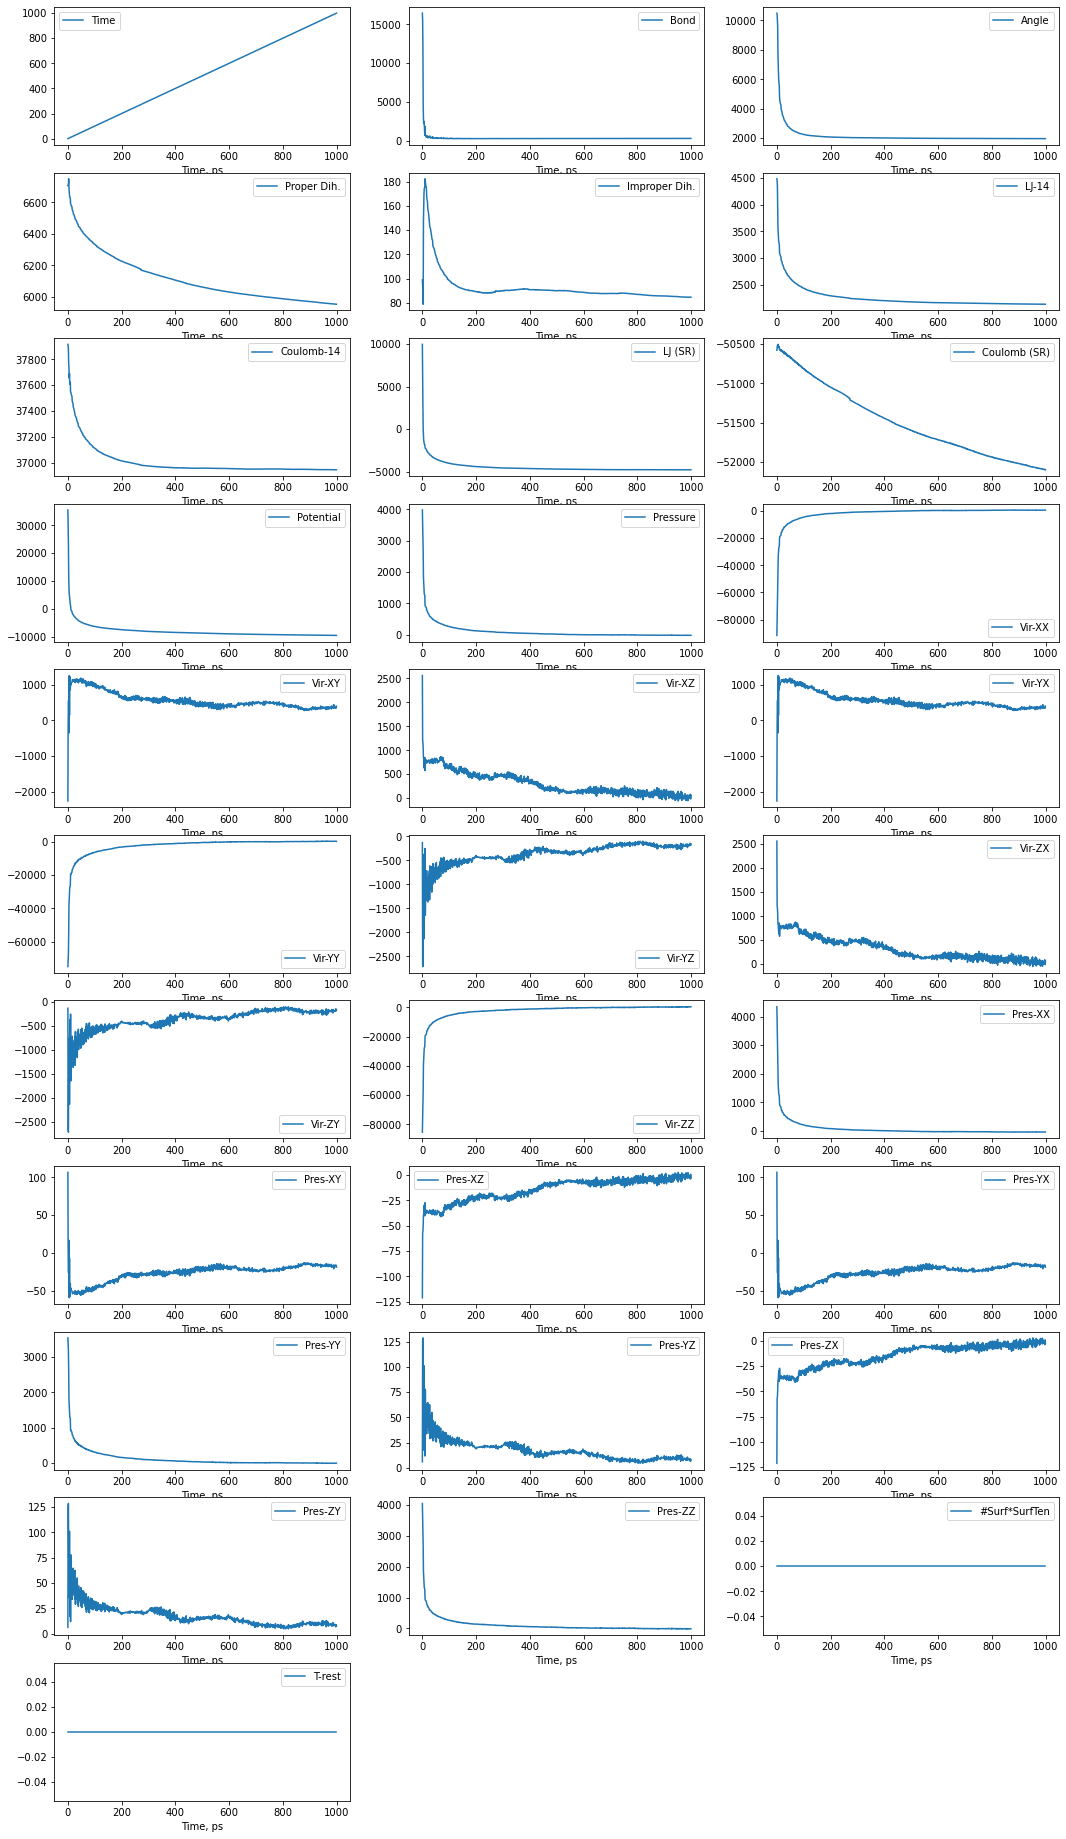

In [51]:
import panedr
import matplotlib.pyplot as plt
df = panedr.edr_to_df('minim.edr', verbose=True)
num_of_keys=len(df.keys())
grid=[1+num_of_keys//3,3]

plt.figure(figsize=(grid[1]*6,grid[0]*3))
plt.title('Mod')
for i,key in enumerate(df.keys(),1):
    ax=plt.subplot(*grid, i)
    ax.plot(df[key][0:1000],label=key)
    ax.set_xlabel('Time, ps')
    ax.legend()    
plt.show()